## Importing Essential Libraries, Filtering Warnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Reading the CSV File, Understanding the data, datatypes, missing values, and statistics

In [2]:
df = pd.read_csv(r'E:\Learning Data Science With Python\Data Science 104 - Machine Learning Models\Data Science 104 - KMeans Clustering\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Cleaning the data to retain the numerical columns for KMeans Analysis

In [6]:
df.drop(columns=['CustomerID','Gender'], inplace=True)

In [7]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Assigning the features to the x-variable.

* We are using 'Annual Income' and 'Spending Score' as our main features for KMeans calculation.
* This means that, these two factors will be plotted on the scatter chart and the centroids will be built on the distance between the points plotted.

In [8]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Starting the K-Means Clustering

### Elbow Method

* We first check the 'Within Cluster Sum of Squares' for a range of n=1 to 10.
* The appropriate number of clusters is that point on the graph where the line starts to bend in a 'linear' fashion.
* Plotting this on the graph makes it easier to visualize and choose the appropriate value for the KMeans n_clusters parameter.

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=69)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25029.253424935883,
 21838.863692828912,
 19636.75396489815]

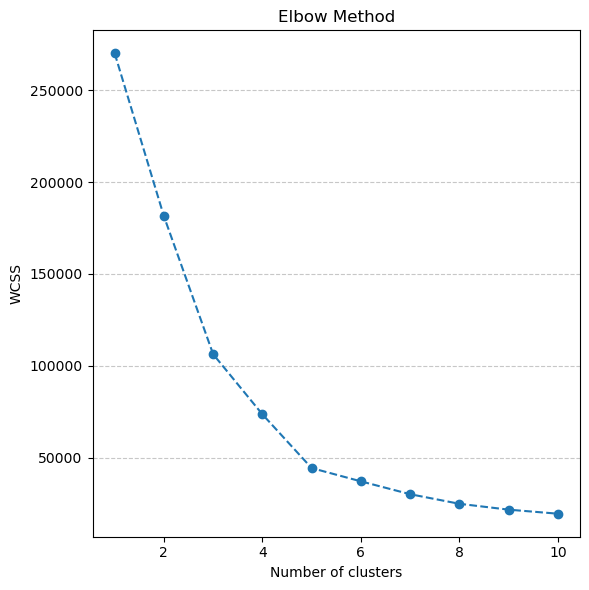

In [12]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.show()

### Model Fitting

* We identify that the appropriate number of clusters is 5. 
* We fit this data and create a new column in our dataframe called 'Clusters', so we can easily categorize which customer belongs to which cluster.
* This will help us in plotting and identifying them for future analysis.

In [36]:
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(x)

In [37]:
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [38]:
df['Clusters'] = clusters

In [39]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,2
1,21,15,81,4
2,20,16,6,2
3,23,16,77,4
4,31,17,40,2


### Plotting the Clusters on the Graph.

* We assign 5 different variables to each cluster.
* Then we proceed to plot them on a single scatter plot, where each variable represents a cluster.
* We also plot the centroids to understand where they are placed on the scatter plot to identify how each item belongs to its respective cluster. (Euclidean distance between the data point and the centroid.)

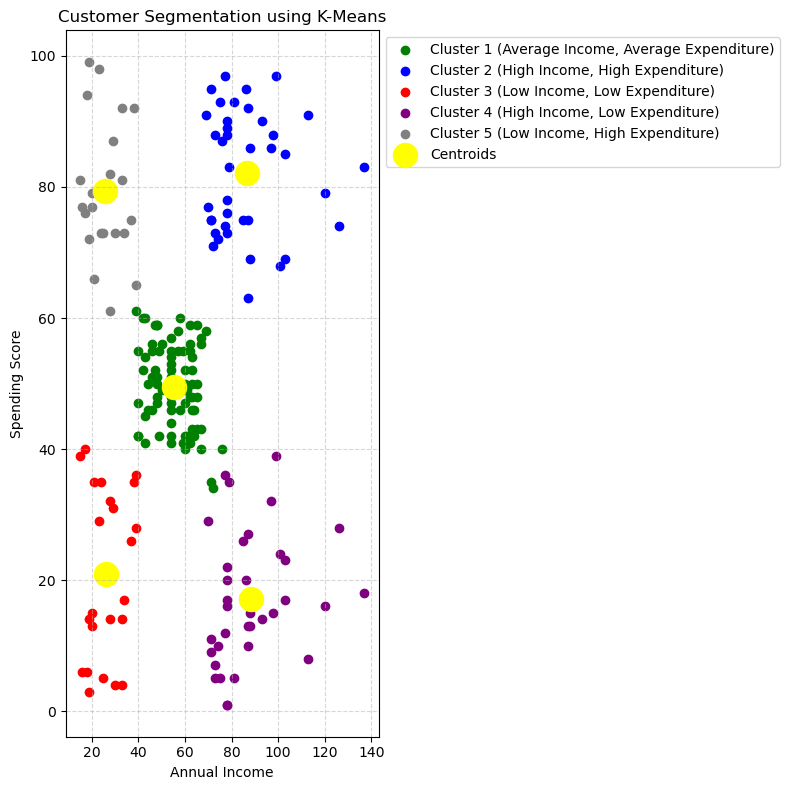

In [41]:
c1 = df[df.Clusters==0]
c2 = df[df.Clusters==1]
c3 = df[df.Clusters==2]
c4 = df[df.Clusters==3]
c5 = df[df.Clusters==4]

plt.figure(figsize=(8,8))

plt.scatter(c1['Annual Income (k$)'], c1['Spending Score (1-100)'], color='green', label='Cluster 1 (Average Income, Average Expenditure)')
plt.scatter(c2['Annual Income (k$)'], c2['Spending Score (1-100)'], color='blue', label='Cluster 2 (High Income, High Expenditure)')
plt.scatter(c3['Annual Income (k$)'], c3['Spending Score (1-100)'], color='red', label='Cluster 3 (Low Income, Low Expenditure)')
plt.scatter(c4['Annual Income (k$)'], c4['Spending Score (1-100)'], color='purple', label='Cluster 4 (High Income, Low Expenditure)')
plt.scatter(c5['Annual Income (k$)'], c5['Spending Score (1-100)'], color='grey', label='Cluster 5 (Low Income, High Expenditure)')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', s=300, marker='o', label='Centroids')

plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-Means')

plt.legend(bbox_to_anchor = (1,1))

plt.tight_layout()
plt.show()

## Insights

* We have generated 5 segments for our customers. These are as follows: i) Average Income Average Expenditure (Green), ii) High Income High Expenditure (Blue), iii) Low Income Low Expenditure (Red), iv) High Income Low Expenditure (Purple), Low Income High Expenditure (Grey)
* Ideally, from a business point of view, we can give customized marketing solutions to these segments.
* For instance, the High-Income, High-Expenditure segment can be given regular notifications about upcoming luxury products that they might be interested in based on their past purchase history.
* Similarly, the Low-Income, Low-Expenditure category can be given a plethora of recommendations and suggestions (basically just advertisements) on impulsive products, since they often spend a lot of money despite they have low annual income levels.
* The Average-Income, Average-Expenditure category can get the regular ads that the mall will generate. There is often a 50-50 chance (or lower) that these consumers don't really care about the advertisement and only come to purchase something they essentially need.